# **Lab 9**: April 10, 2019.
## Topic: SHA-256

Main concept: To apply work through the compression function of SHA-256.

In [119]:
#These are some imports that we will use later. Below are functions that you may find useful during the lab. Remember to run this cell.
from sage.all import *

#This function performs the logical 'not' operator on a hexadecimal string. It returns a binary string.
def bin_not(E):
    ones = '1'*len(bin(int(E,16))[2:])
    return bin(int(E,16)^int(ones,2))

#This function is for the Ma operation for SHA-256. It returns a hexadecimal string.
def maj(A,B,C):
    return hex((int(A,16)&int(B,16))^(int(A,16)&int(C,16))^(int(B,16)&int(C,16)))

#This function is for the Sigma operations for SHA-256. It returns a hexadecimal string.
def rotate(A, num_1, num_2, num_3):
    A_bin = bin(int(A,16))[2:]
    A_shift_1 = A_bin[-num_1:]+A_bin[:-num_1]
    A_shift_2 = A_bin[-num_2:]+A_bin[:-num_2]
    A_shift_3 = A_bin[-num_3:]+A_bin[:-num_3]
    return hex(int(A_shift_1,2)^int(A_shift_2,2)^int(A_shift_3,2))

#This function is for the Ch operation for SHA-256. It returns a hexadecimal string.
def choice(E,F,G):
    return hex((int(E,16)&int(F,16))^(int(bin_not(E),2)&int(G,16)))

#This function adds two hexadecimal strings and returns a hexadecimal string.
def hex_add(A,B):
    return hex(int(A,16)+int(B,16))

### Part 1: Initializing values for SHA-256

First we need a message that we will hash. To make this process easier, we will hash a 32-bit message.

Let the message be $w = \texttt{`0xf2835bd1'}$.

In this part of the lab we will initialize values that will be used in the rest of the parts.

**Exercise 1.1**: Initialize your message. Below assign the 32-bit message value to $w$. 

*Note: hexadecimal numbers are stored as strings, so your code should look like $\texttt{w=`0xf2835bd1'}.$

In [0]:
w = 

**Exercise 1.2**: Now let's save the initial hash values. These are the values that I wrote on the board on Monday. We will want to label them $A, \ldots, H$. Copy the values below into a code cell and label appropriately, for example, we want $A$ to be initialized with $\texttt{h0}$ and this is done below.

$\texttt{h0 = 0x6a09e667}$

$\texttt{h1 = 0xbb67ae85}$

$\texttt{h2 = 0x3c6ef372}$

$\texttt{h3 = 0xa54ff53a}$

$\texttt{h4 = 0x510e527f}$

$\texttt{h5 = 0x9b05688c}$

$\texttt{h6 = 0x1f83d9ab}$

$\texttt{h7 = 0x5be0cd19}$

In [104]:
A = '0x6a09e667'

**Exercise 1.3**: To see what decimal number these hexadecimal numbers are, you can use the code $\texttt{int(A,16)}$. Try this below.

### Part 2a: The compression algorithm in SHA-256 - doing the operations

Now we will go through what happens in the "compression algorithm" that we discussed yesterday. In a longer message, it would be broken up into 512-bit chunks, and then each of those chunks is broken down into 32-bit pieces. Each 32-bit piece goes through the process below (see note below). Some of the operations needed are coded above (including $\texttt{maj}, \texttt{rotate}, \texttt{choice}$).

*Note: There are more details here that I am sweeping under the rug. If you are interested in them, please ask!*

**Exercise 2.1**: Following your schematic, the first thing to do is apply the $\texttt{choice}$ function to $E, F,$ and $G$. Save the output to a variable called $\texttt{Ch}$. 

*Note*: You may notice that the order in which you put the parameters into the function matters. Make sure to do $\texttt{choice(E,F,G)}$.

**Exercise 2.2**: The next item on the schematic is to apply the rotate operator to $E$. You should rotate by 6, 11, and 25. Save the output to a variable called $\texttt{Sig_1}$.

**Exercise 2.3**: Following your schematic, the next thing to do is apply the $\texttt{maj}$ function to $A, B,$ and $C$. Save the output to a variable called $\texttt{Ma}$.

**Exercise 2.4**: The next item on the schematic is to apply the rotate operator to $A$. You should rotate by 2, 13, and 22. Save the output to a variable called $\texttt{Sig_0}$.

### Part 2b: The compression algorithm in SHA-256 - assigning new values

Now we want to start replacing our $A, \ldots, H$ values with new ones according to the schematic.

**Question 2.5**: When finding new values we will have to add hexadecimal values. However, to add hexadecimal strings is a bit tricky. If you do $w + k$ what happens? Why is this incorrect?

**Exercise 2.6**: Instead, you can convert the hexadecimal strings back to integers and then add modulo $2^{32}$. Once you are done with the addition you can convert it back to a hexadecimal string. To convert a hexadecimal string to an integer use the code from before $\texttt{int(w,16)}$. To convert a number back to hexadecimal you use the code $\texttt{hex()}$.

Using this information, find the new $A$ value and store it in the variable $\texttt{new_A}$. According to the schematic, we have to add $w$, a value $k, H, \texttt{Ch}, \texttt{Sig_1}, \texttt{Ma}$, and $\texttt{Sig_0}$ modulo $2^{32}$. The value $k$ is a number chosen by the NSA and in this case it is $k=\texttt{0x428a2f98}$.

**Exercise 2.7**: To create new $B,C,D$ is very simple. According to the schematic, the new $B$ is the old $A$, the new $C$ is the old $B$, and the new $D$ is the old $C$. Store the new values for $B, C$, and $D$ in $\texttt{new_B}, \texttt{new_C},$ and $\texttt{new_D}$, respectively. 

**Exercise 2.8**: To create a new $E$, we have to add $\texttt{Sig_1}, \texttt{Ch}, H, w,$ and the value $k$ (again, do this the way you did **Exercise 2.6** and remember to work modulo $2^{32}$). Remember that $k=\texttt{0x428a2f98}$. Store this new value in $\texttt{new_E}$.

**Exercise 2.9**: To create new $F,G,H$ is also very simple. According to the schematic, the new $F$ is the old $E$, the new $G$ is the old $F$, and the new $H$ is the old $G$. Store the new values for $F, G$, and $H$ in $\texttt{new_F}, \texttt{new_G},$ and $\texttt{new_H}$, respectively.

**Exercise 2.10**: Finally, to get the hashed value we append our hexadecimal strings for the new $A, B, \ldots, H$. What is the hash?

*Note: You should not include the hex header '0x' in the final hash.*

### Part 3: Where is this used?

Recently we learned about elliptic curve digital signature algorithm (EC-DSA) and now SHA-256. Both of these are used in mining Bitcoins. The EC-DSA is used to create keys and addresses for users of Bitcoin. The addresses are used to dictate where the money is flowing and signatures are used for authentication. The hash functions are used to compress a ton of data (signatures, sending and receiving money, old transactions) down to message digests. These data is then linked which forms a blockchain.

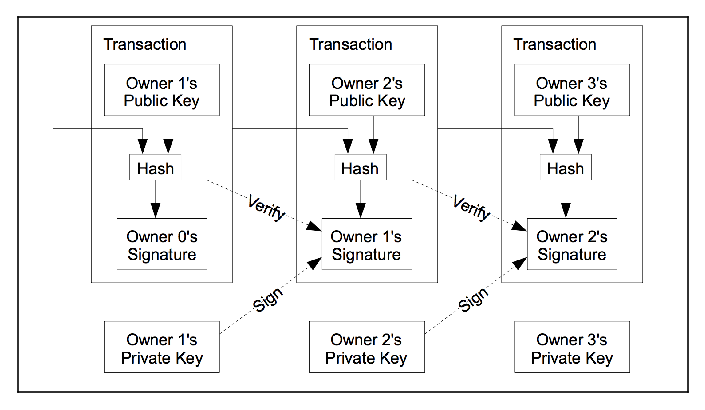

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.xticks([]), plt.yticks([])
plt.imshow(mpimg.imread('BitcoinTransactions.png'))